# Echoes of Tomorrow: Exploring Life's Path through self-destruction
Analyzing different factors that affect suicide count using k-nearest neighbor regression

Submitted by:
- Baybay, Alliana Eli U.
- Cespedes, Karsci Vincze A.
- Megalbio, DJ Alen
- Pocol, Czarr Vic Israel
- Saquilayan, Erykha

## Problem
### Problem Statement
The aim of this analysis is to create predictive models that can be used to establish a connection between socioeconomic factors and suicide counts. The present study seeks to predict the count of suicides on variables like population size, GDP (Gross Domestic Product) and death rate per 100K individuals.
### Objective
This analysis aims at building predictive models using machine learning techniques in order to understand how suicide counts correlate with socioeconomic factors. By determining which predictors are associated with high rates of suicidal cases, we may offer some suggestions that may help in designing public health policies for preventing suicides.

## Background
Suicide is a complex public health problem which is influenced by various factors including socio-economic conditions, mental health and access to healthcare services. Understanding the relationship between economic indicators and suicide rates will facilitate targeted interventions and policies for reducing suicide rates as well as enhancing mental health outcomes. 

## Data discussion
According to the analysis done using the dataset given, there are a number of important discoveries or insights. 

First and foremost, starting from 1990 and ending in 2022, this dataset contains various variables that explain suicide rates. Other data sets on other social aspects including population size, GDP etc are also present. For instance as an example you could have suicide counts plotted against population size or death rate per 100000 people among others. 

Exploratory data analysis showed certain trends and links between individual variables. Specifically, scatter plots depicting suicide counts versus GDP, population and death rate per 100000 individuals indicated evident patterns. In particular, there was a connection between the numbers of suicides committed with demographic information such as gender and age; moreover it became clear that the countries having higher amount of suicides were characterized by increasing health risks leading to deaths due to avoidable causes like fire arms' wounds. Although it is necessary to carry out more researches which will enable us establish how strong these relations can be defined more accurately as well as their directionality. 

Moreover, applying Pearson correlation coefficient allowed one numerically assess the connections among variables. It is worth noting that different factors had different strength in their relationship with varying degree of correlation with suicide counts Examples of these variables include population size, GDP and death rate per 100000 individuals who have been observed to exhibit strong positive correlation with suicidal cases. 

KNeighborsRegressor was used to develop predictive models for suicide counts based on a range of independent variables and test them. The train and test scores obtained indicate that the models had varying degrees of accuracy. For example, the models trained using population size as an independent variable were fairly accurate, while those employing GDP or death rate per 100,000 persons showed lower levels of accuracy. 

In sum, the data analysis points out how complex suicide rates are interconnected with other variables thus warranting further investigations. This has policy implications in terms of developing targeted interventions and strategies by healthcare providers with regard to mental health problem cases as well as efforts towards reducing suicidality rates. Nonetheless, these findings should be interpreted cautiously and further research is necessary in order to confirm these trends or correlations. 

## Top 3 highlights
- The region with the highest suicide count is europe followed by asia
- The feature with the highest correlation with suicide count is population, followed by GDP and GNI
- The feature with the lowest correlation is the employment population ratio. This means that the employment of citizens doesn't have a strong indication of high suicide counts

# KNN Implementation

## Importing Libraries

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mglearn
import statistics
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr
import scipy.stats as stats
from pyod.models.kde import KDE
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pylab as plot
import math

## Data Preparation

In [3]:
df = pd.read_csv("age_std_suicide_rates_1990-2022.csv")
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [4]:
#Dropping the Null values
df = df.dropna()

## Choosing the Data Variables

### Dropping of variables

In [5]:
#Choosing the variables
df = df.drop(['RegionName',  'CountryName'], axis = 1)

In [6]:
print("Info on Dataset")
print(df.info())

Info on Dataset
<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 5371
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    4698 non-null   object 
 1   CountryCode                   4698 non-null   object 
 2   Year                          4698 non-null   int64  
 3   Sex                           4698 non-null   object 
 4   SuicideCount                  4698 non-null   int64  
 5   CauseSpecificDeathPercentage  4698 non-null   float64
 6   StdDeathRate                  4698 non-null   float64
 7   DeathRatePer100K              4698 non-null   float64
 8   Population                    4698 non-null   float64
 9   GDP                           4698 non-null   float64
 10  GDPPerCapita                  4698 non-null   float64
 11  GNI                           4698 non-null   float64
 12  GNIPerCapita                  4698 non-null   float

## Exploratory Data Analysis

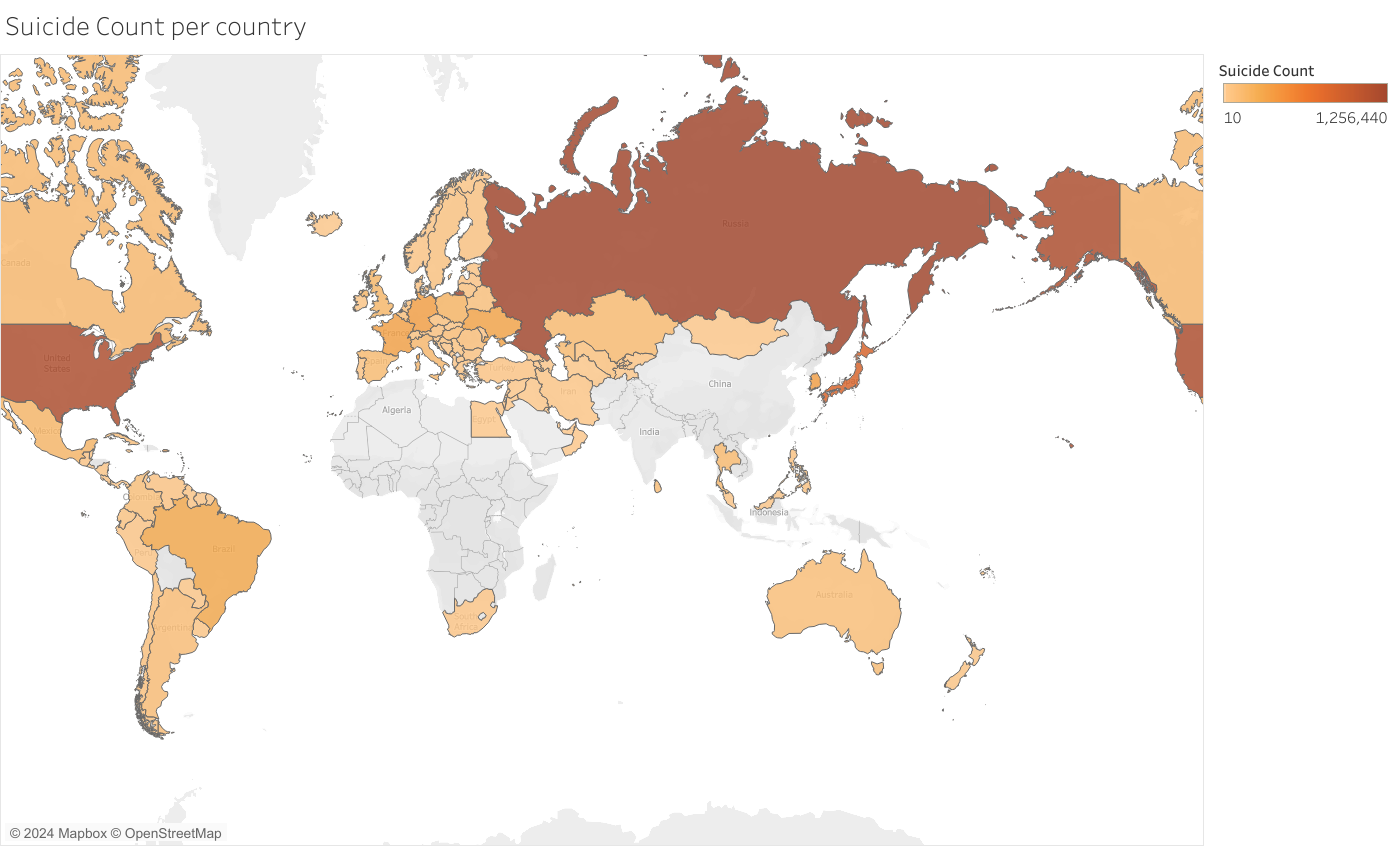

In [7]:
Image("Sheet 1 (1).png")

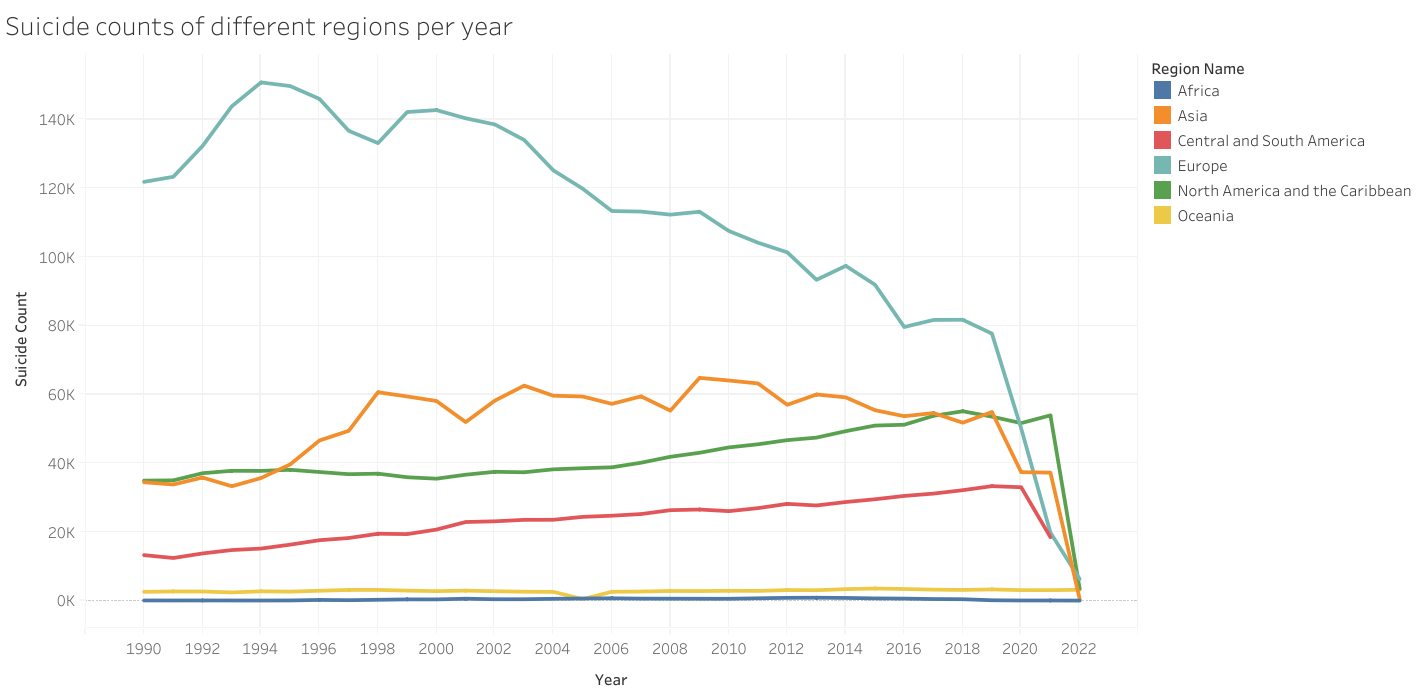

In [8]:
Image("Sheet 2 (1).png")

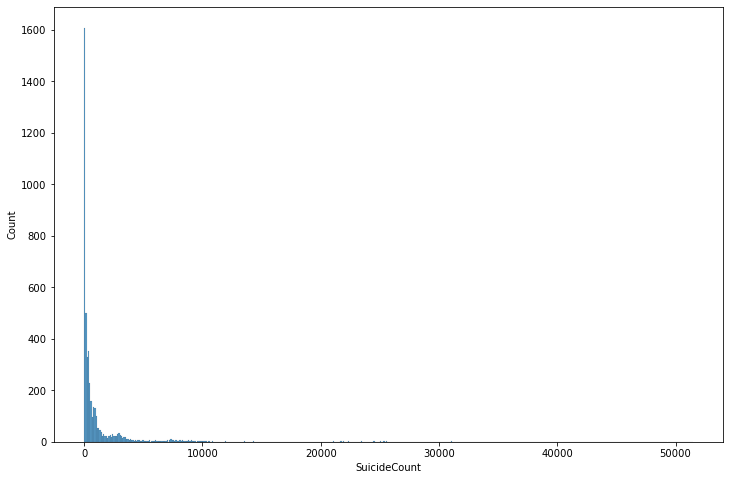

In [9]:
sns.histplot(data = df, x = "SuicideCount")
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

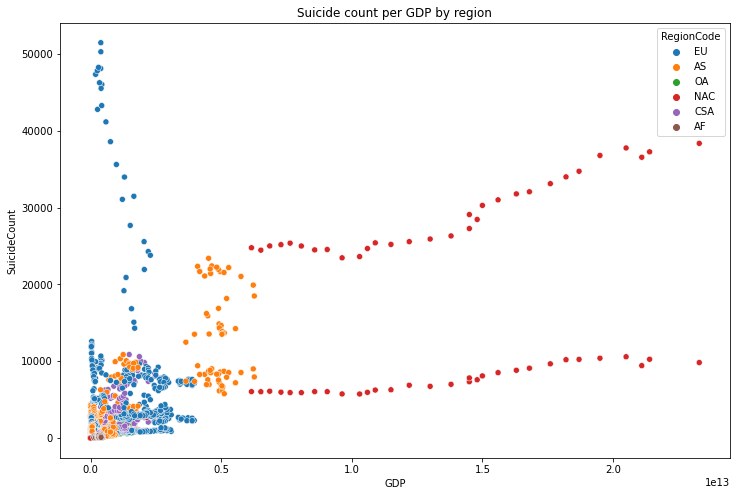

In [10]:
sns.scatterplot(x = 'GDP', y = 'SuicideCount', hue='RegionCode', data=df).set(title='Suicide count per GDP by region')
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

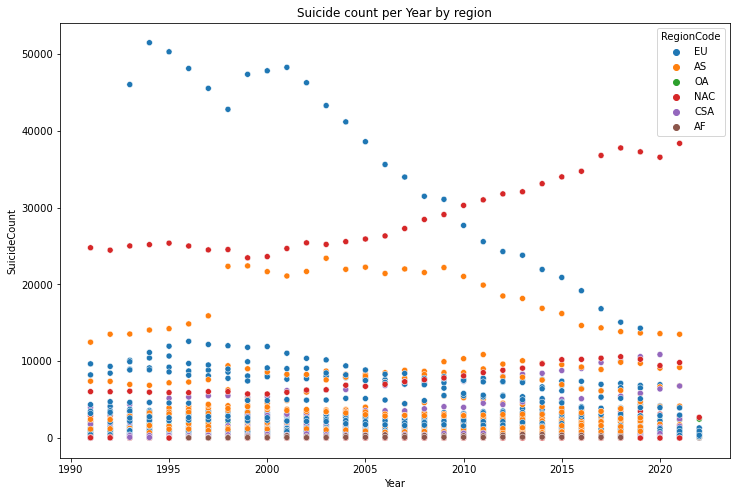

In [11]:
sns.scatterplot(x = 'Year', y = 'SuicideCount', hue='RegionCode', data=df).set(title='Suicide count per Year by region')
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

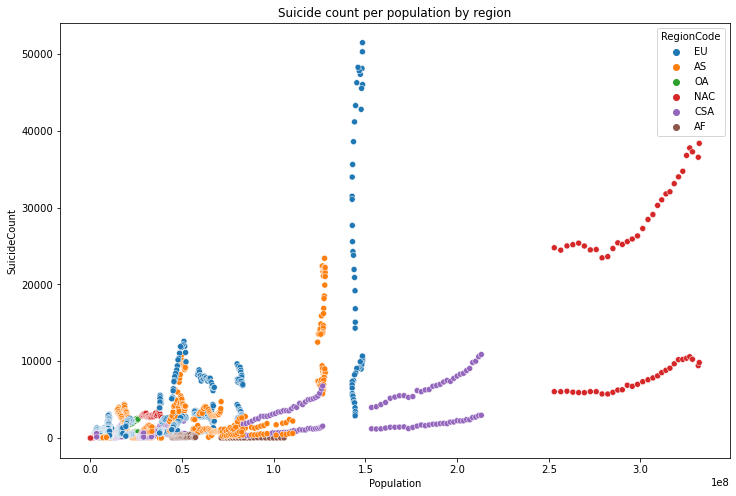

In [12]:
sns.scatterplot(x = 'Population', y = 'SuicideCount', hue='RegionCode', data=df).set(title='Suicide count per population by region')
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

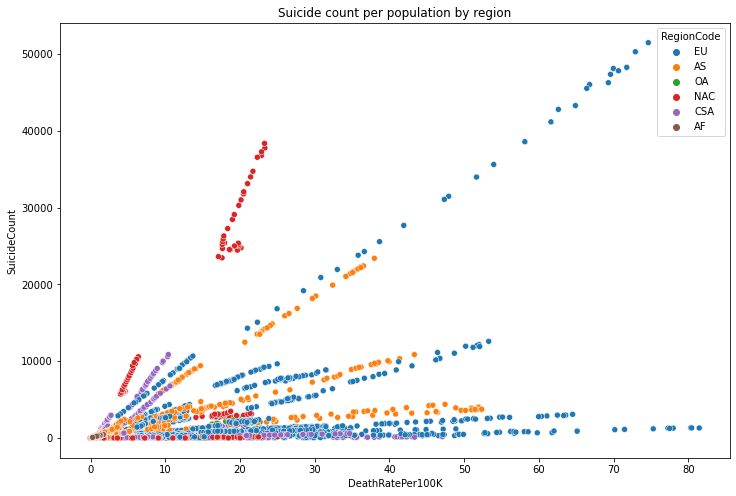

In [13]:
sns.scatterplot(x = 'DeathRatePer100K', y = 'SuicideCount', hue='RegionCode', data=df).set(title='Suicide count per population by region')
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

### Assigning the X variables (independent) and y variable (target)
The X variables are the following:
- Year
- CauseSpecificDeathPercentage
- StdDeathRate
- DeathRatePer100K
- Population
- GDP
- GDPPerCapita
- GNI
- GNIPerCapita
- InflationRate
- EmploymentPopulationRatio <br>

The y variable is the <strong>suicide count

In [14]:
X = df.drop(['SuicideCount', 'RegionCode', 'CountryCode', 'Sex'], axis = 1)
y = df['SuicideCount']

### Finding the correlations of each variable to the target variable

In [15]:
#Correlation coefficient of each feature
for i in X.columns:
    corr, _ = pearsonr(df[i], y)
    print("column: " + i)
    print('Pearsons correlation: %.3f' % corr)

column: Year
Pearsons correlation: -0.034
column: CauseSpecificDeathPercentage
Pearsons correlation: 0.312
column: StdDeathRate
Pearsons correlation: 0.392
column: DeathRatePer100K
Pearsons correlation: 0.408
column: Population
Pearsons correlation: 0.674
column: GDP
Pearsons correlation: 0.591
column: GDPPerCapita
Pearsons correlation: 0.083
column: GNI
Pearsons correlation: 0.591
column: GNIPerCapita
Pearsons correlation: 0.050
column: InflationRate
Pearsons correlation: 0.043
column: EmploymentPopulationRatio
Pearsons correlation: 0.019


### Choosing the independent variables:
The following are the X variables to be used in machine learning because of their high correlation with the target variable:
- Population
- GDP / GNI ('same values')
- DeathRatePer100k

### Testing the model

### Training the Data of all features and suicide count

In [133]:
#Splitting the data
X_train, X_test, y_train, y_test = tts(X, y, random_state=49, test_size = 0.25)

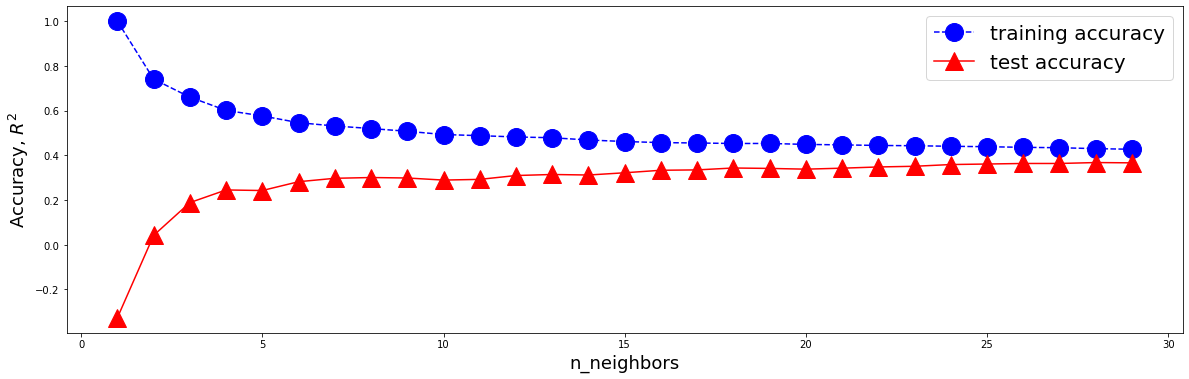

In [134]:
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

Using this visualization, we can see that the optimal number of n_neighbors is 29

In [135]:
reg1 = KNeighborsRegressor(n_neighbors=29) # build the model 
reg1.fit(X_train, y_train)
d1_train = reg1.score(X_train, y_train)
d1_test = reg1.score(X_test, y_test)
print("Train Score:")
print(reg1.score(X_train, y_train))
print("Test Score: ")
print(reg1.score(X_test, y_test))

Train Score:
0.4271490133932009
Test Score: 
0.3664614563349101


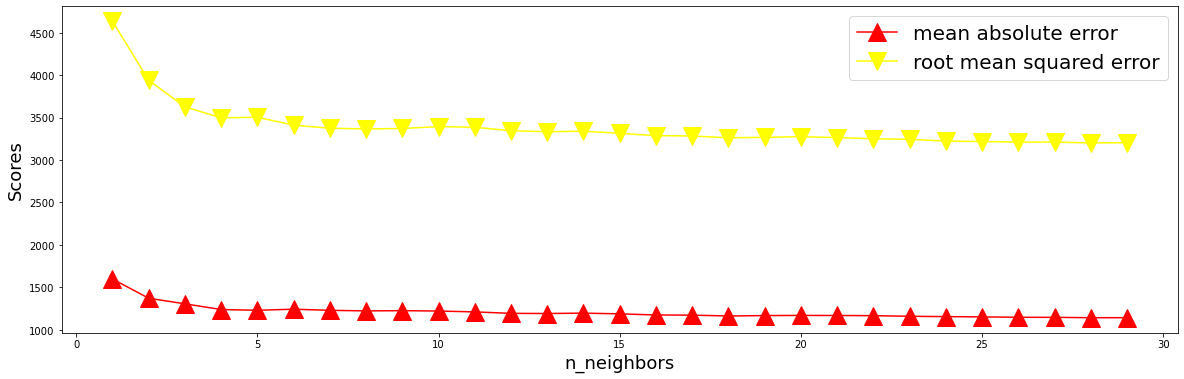

In [136]:
#Getting the Mean_squared_error, Mean_absolute Error, and the root_Mean_squared_error
mse = []
mae = []
rmse = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    mse.append(mean_squared_error(y_test, reg.predict(X_test)))
    mae.append(mean_absolute_error(y_test, reg.predict(X_test)))    
    rmse.append(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mae, label="mean absolute error",
         color='red', marker='^', linestyle='-', markersize=18)
plt.plot(neighbors_settings, rmse, label="root mean squared error",
         color='yellow', marker='v', linestyle='-', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

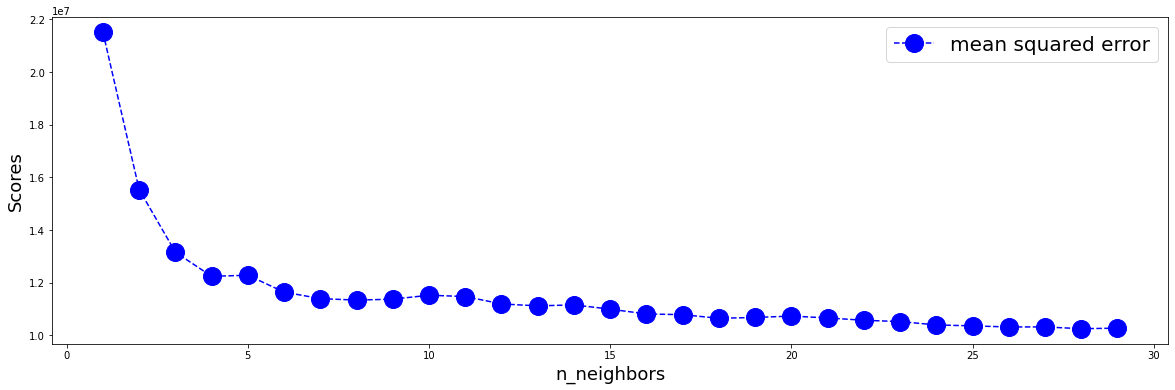

In [137]:
#Mean_Squared_error
fig = plt.figure(figsize=(20, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mse, label="mean squared error", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

In [138]:
#Getting the Mean_squared_error and 
print("The following are the evaluations:")
d1_mse = mean_squared_error(y_test, reg1.predict(X_test))
d1_mae = mean_absolute_error(y_test, reg1.predict(X_test))
d1_rmse = math.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, reg1.predict(X_test))))
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, reg1.predict(X_test))))
print("Mean squared error: {:.2f}".format(math.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))))

The following are the evaluations:
Mean squared error: 10273364.89
Mean absolute error: 1141.55
Mean squared error: 3205.21


# Using the top 3 features as the independent variable

In [139]:
std = StandardScaler()

X_pop = X['Population']
X_GDP = X['GDP']
X_DRP = X['DeathRatePer100K']

#Scaling the variables
X_pop = std.fit_transform(X_pop.values.reshape(-1, 1)) 
X_GDP = std.fit_transform(X_GDP.values.reshape(-1, 1)) 
X_DRP = std.fit_transform(X_DRP.values.reshape(-1, 1)) 


### Training the Data for population and suicide count

In [140]:
#Splitting the data
X_train, X_test, y_train, y_test = tts(X_pop, y, random_state=49, test_size = 0.25)

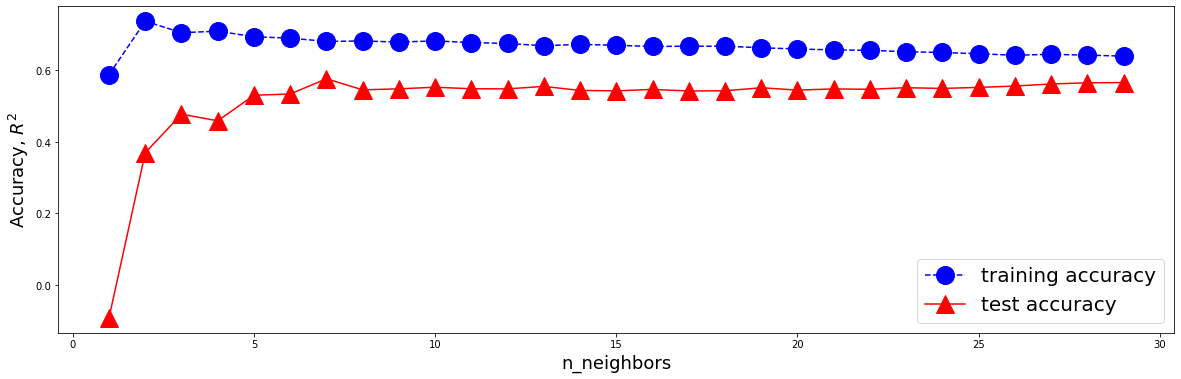

In [141]:
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train.reshape(-1, 1), y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(X_train.reshape(-1, 1), y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(X_test.reshape(-1, 1), y_test)) # record generalization accuracy    

fig = plt.figure(figsize=(20, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

Using this visualization, we can see that the optimal number of n_neighbors is 29

In [143]:
reg1 = KNeighborsRegressor(n_neighbors=29) # build the model 
reg1.fit(X_train.reshape(-1, 1), y_train)
d2_train = reg1.score(X_train, y_train)
d2_test = reg1.score(X_test, y_test)
print("Train Score:")
print(reg1.score(X_train.reshape(-1, 1), y_train))
print("Test Score: ")
print(reg1.score(X_test.reshape(-1, 1), y_test))

Train Score:
0.6400101580139438
Test Score: 
0.5660259050035192


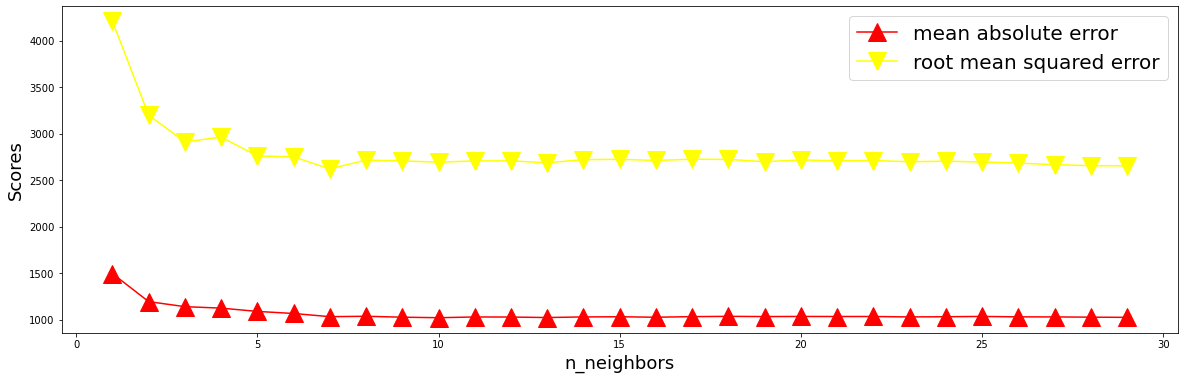

In [144]:
#Getting the Mean_squared_error, Mean_absolute Error, and the root_Mean_squared_error
mse = []
mae = []
rmse = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    mse.append(mean_squared_error(y_test, reg.predict(X_test)))
    mae.append(mean_absolute_error(y_test, reg.predict(X_test)))    
    rmse.append(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mae, label="mean absolute error",
         color='red', marker='^', linestyle='-', markersize=18)
plt.plot(neighbors_settings, rmse, label="root mean squared error",
         color='yellow', marker='v', linestyle='-', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

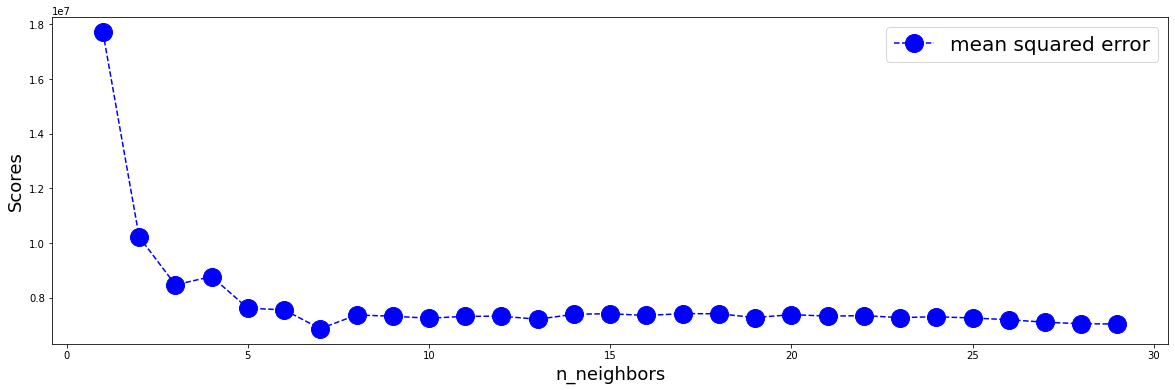

In [145]:
#Mean_Squared_error
fig = plt.figure(figsize=(20, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mse, label="mean squared error", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

In [146]:
#Getting the Mean_squared_error and 
d2_mse = mean_squared_error(y_test, reg1.predict(X_test))
d2_mae = mean_absolute_error(y_test, reg1.predict(X_test))
d2_rmse = math.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))
print("The following are the evaluations:")
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, reg1.predict(X_test))))
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, reg1.predict(X_test))))
print("Mean squared error: {:.2f}".format(math.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))))

The following are the evaluations:
Mean squared error: 7037258.07
Mean absolute error: 1023.29
Mean squared error: 2652.78


### Training the Data for GDP and suicide count

In [147]:
#Splitting the data
X_train, X_test, y_train, y_test = tts(X_GDP, y, random_state=49, test_size = 0.25)

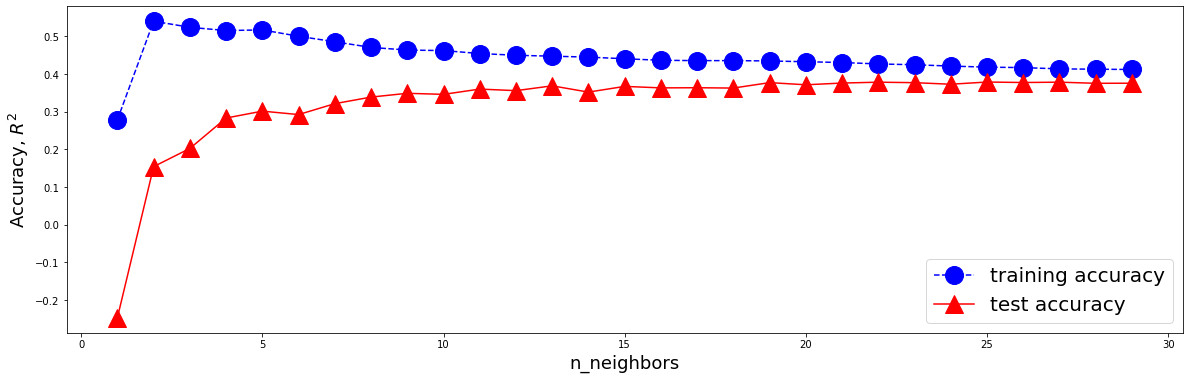

In [148]:
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train.reshape(-1, 1), y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(X_train.reshape(-1, 1), y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(X_test.reshape(-1, 1), y_test)) # record generalization accuracy    

fig = plt.figure(figsize=(20, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

Using this visualization, the optimal n_neighbors for this dataset is 25

In [149]:
reg2 = KNeighborsRegressor(n_neighbors=25) # build the model 
reg2.fit(X_train.reshape(-1, 1), y_train)
d3_train = reg1.score(X_train, y_train)
d3_test = reg1.score(X_test, y_test)
print("Train Score:")
print(reg2.score(X_train.reshape(-1, 1), y_train))
print("Test Score: ")
print(reg2.score(X_test.reshape(-1, 1), y_test))

Train Score:
0.41809263485348236
Test Score: 
0.37857076086793284


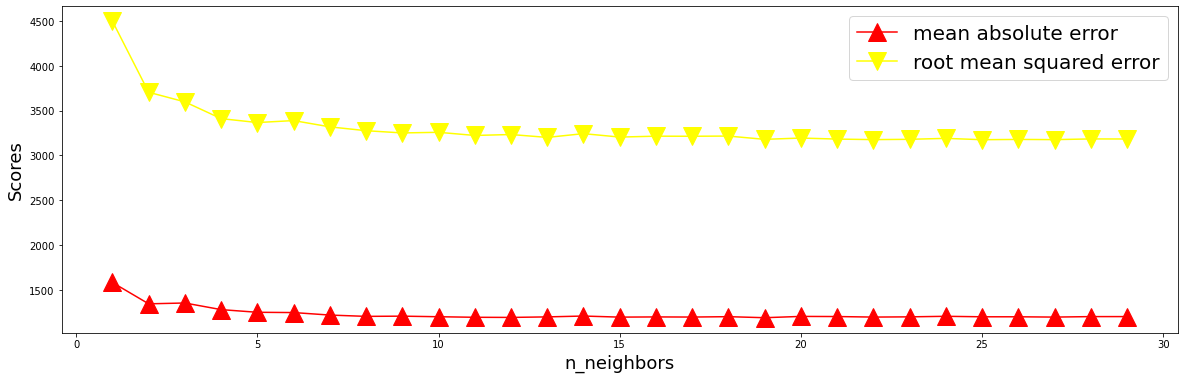

In [150]:
#Getting the Mean_squared_error, Mean_absolute Error, and the root_Mean_squared_error
mse = []
mae = []
rmse = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    mse.append(mean_squared_error(y_test, reg.predict(X_test)))
    mae.append(mean_absolute_error(y_test, reg.predict(X_test)))    
    rmse.append(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mae, label="mean absolute error",
         color='red', marker='^', linestyle='-', markersize=18)
plt.plot(neighbors_settings, rmse, label="root mean squared error",
         color='yellow', marker='v', linestyle='-', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

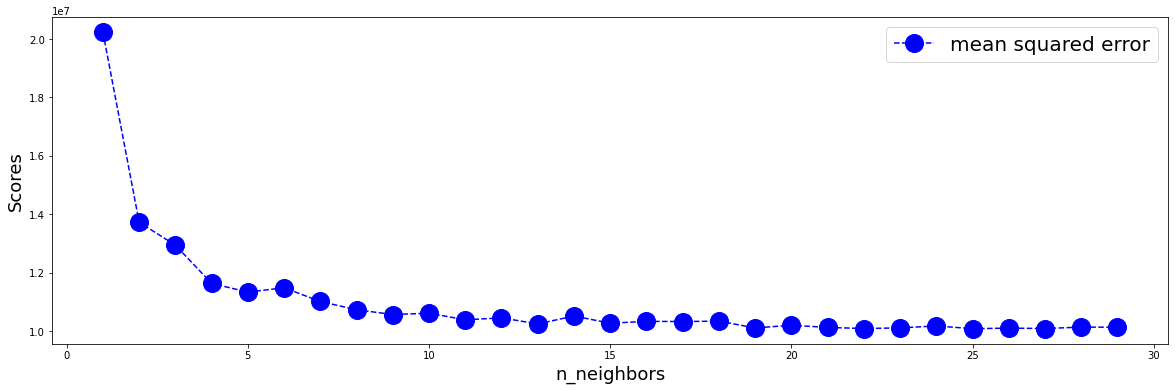

In [151]:
#Mean_Squared_error
fig = plt.figure(figsize=(20, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mse, label="mean squared error", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

In [152]:
#Getting the Mean_squared_error and 
d3_mse = mean_squared_error(y_test, reg2.predict(X_test))
d3_mae = mean_absolute_error(y_test, reg2.predict(X_test))
d3_rmse = math.sqrt(mean_squared_error(y_test, reg2.predict(X_test)))
print("The following are the evaluations:")
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, reg2.predict(X_test))))
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, reg2.predict(X_test))))
print("Mean squared error: {:.2f}".format(math.sqrt(mean_squared_error(y_test, reg2.predict(X_test)))))

The following are the evaluations:
Mean squared error: 10077002.24
Mean absolute error: 1198.18
Mean squared error: 3174.43


### Training the data for DRP and suicide count

In [153]:
#Splitting the data
X_train, X_test, y_train, y_test = tts(X_DRP, y, random_state=49, test_size = 0.25)

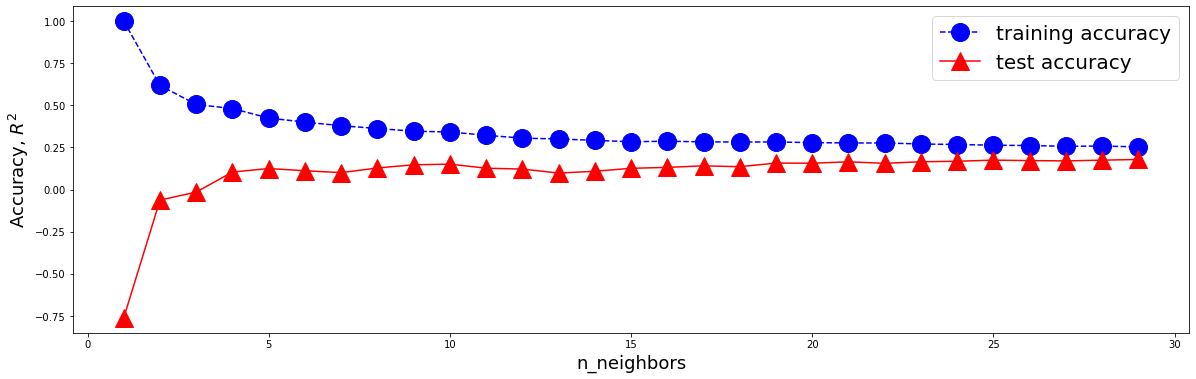

In [154]:
training_accuracy = []  
test_accuracy = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train.reshape(-1, 1), y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    training_accuracy.append(reg.score(X_train.reshape(-1, 1), y_train)) # record training set accuracy  
    test_accuracy.append(reg.score(X_test.reshape(-1, 1), y_test)) # record generalization accuracy    

fig = plt.figure(figsize=(20, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

Using this visualization we can see that the optimal number of neighbors is 26

In [156]:
reg3 = KNeighborsRegressor(n_neighbors=26) # build the model 
reg3.fit(X_train.reshape(-1, 1), y_train)
d4_train = reg1.score(X_train, y_train)
d4_test = reg1.score(X_test, y_test)
print("Train Score:")
print(reg3.score(X_train.reshape(-1, 1), y_train))
print("Test Score: ")
print(reg3.score(X_test.reshape(-1, 1), y_test))

Train Score:
0.26114408791090793
Test Score: 
0.17181984261775896


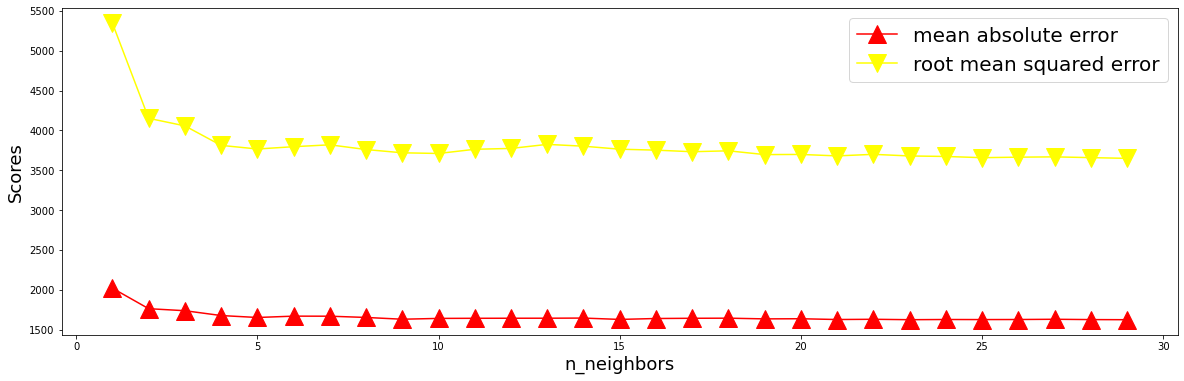

In [157]:
#Getting the Mean_squared_error, Mean_absolute Error, and the root_Mean_squared_error
mse = []
mae = []
rmse = []
neighbors_settings = range(1, 30) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
    mse.append(mean_squared_error(y_test, reg.predict(X_test)))
    mae.append(mean_absolute_error(y_test, reg.predict(X_test)))    
    rmse.append(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

fig = plt.figure(figsize=(20, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mae, label="mean absolute error",
         color='red', marker='^', linestyle='-', markersize=18)
plt.plot(neighbors_settings, rmse, label="root mean squared error",
         color='yellow', marker='v', linestyle='-', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

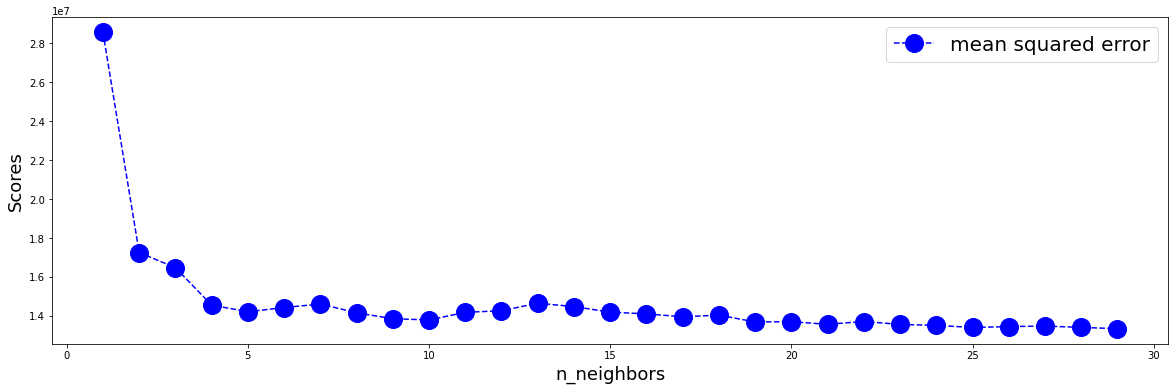

In [158]:
#Mean_Squared_error
fig = plt.figure(figsize=(20, 6))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, mse, label="mean squared error", 
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.ylabel("Scores", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

In [129]:
#Getting the Mean_squared_error and 
d4_mse = mean_squared_error(y_test, reg3.predict(X_test))
d4_mae = mean_absolute_error(y_test, reg3.predict(X_test))
d4_rmse = math.sqrt(mean_squared_error(y_test, reg3.predict(X_test)))
print("The following are the evaluations:")
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, reg3.predict(X_test))))
print("Mean absolute error: {:.2f}".format(mean_absolute_error(y_test, reg3.predict(X_test))))
print("Mean squared error: {:.2f}".format(math.sqrt(mean_squared_error(y_test, reg3.predict(X_test)))))

The following are the evaluations:
Mean squared error: 13429643.76
Mean absolute error: 1628.72
Mean squared error: 3664.65


### Comparing the different train and test accuracies

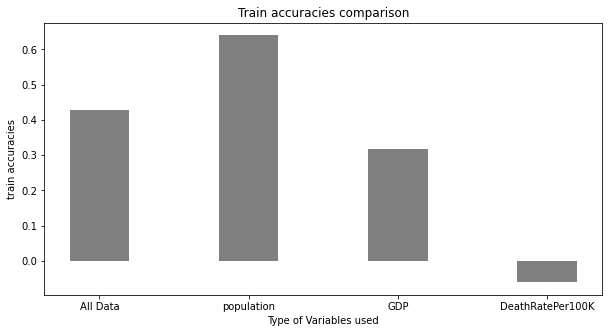

In [159]:
# Comparing the train scores
data = {"All Data": d1_train, "population":d2_train, "GDP": d3_train, "DeathRatePer100K":d4_train}

var = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(var, values, color ='grey', 
        width = 0.4)
 
plt.xlabel("Type of Variables used")
plt.ylabel("train accuracies")
plt.title("Train accuracies comparison")
plt.show()

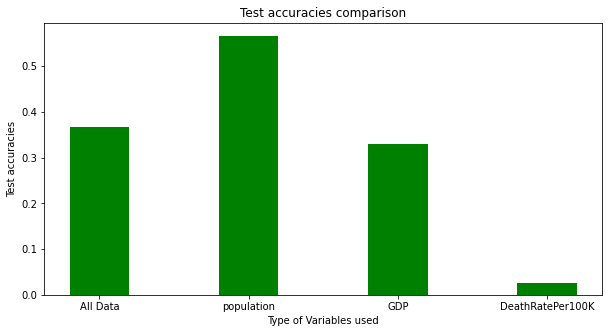

In [160]:
# Comparing the test accuracies
data = {"All Data": d1_test, "population":d2_test, "GDP": d3_test, "DeathRatePer100K":d4_test}

var = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(var, values, color ='green', 
        width = 0.4)
 
plt.xlabel("Type of Variables used")
plt.ylabel("Test accuracies")
plt.title("Test accuracies comparison")
plt.show()

### Comparing the different evaluations:

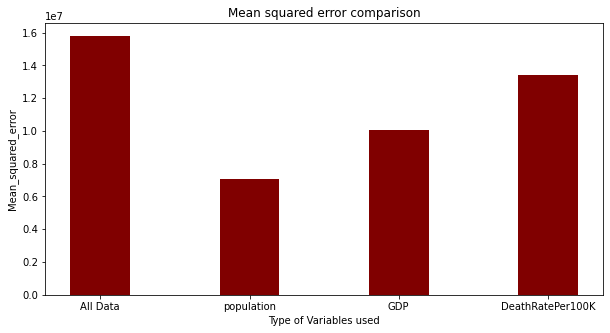

In [130]:
# Comparing the mean squared errors
data = {"All Data": d1_mse, "population":d2_mse, "GDP": d3_mse, "DeathRatePer100K":d4_mse}

var = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(var, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Type of Variables used")
plt.ylabel("Mean_squared_error")
plt.title("Mean squared error comparison")
plt.show()

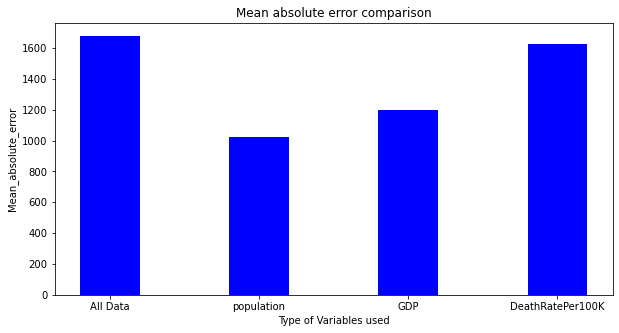

In [131]:
# Comparing the mean absolute errors
data = {"All Data": d1_mae, "population":d2_mae, "GDP": d3_mae, "DeathRatePer100K":d4_mae}

var = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(var, values, color ='blue', 
        width = 0.4)
 
plt.xlabel("Type of Variables used")
plt.ylabel("Mean_absolute_error")
plt.title("Mean absolute error comparison")
plt.show()

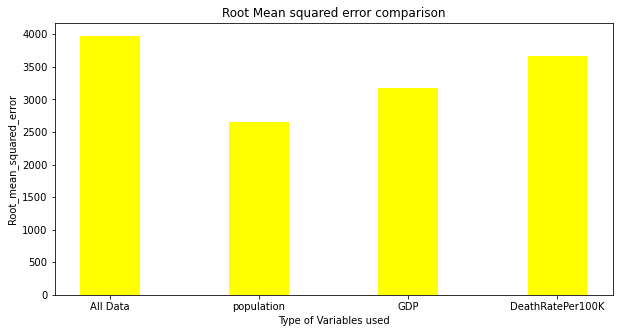

In [132]:
# Comparing the root mean squared errors
data = {"All Data": d1_rmse, "population":d2_rmse, "GDP": d3_rmse, "DeathRatePer100K":d4_rmse}

var = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(var, values, color ='yellow', 
        width = 0.4)
 
plt.xlabel("Type of Variables used")
plt.ylabel("Root_mean_squared_error")
plt.title("Root Mean squared error comparison")
plt.show()

# Discussion of results
The dataset used is highly skewed, espcially the target variable suicide count resulting to a mediocre accuracy. Despite that, the features with the highest correlation with the target variable (population, GDP, DeathRatePer100k) are able to get a low to moderately strong coefficient of determination (R-Sqaured). These are the following accuracies:<br>
<Strong>All features: </Strong>
- Train Score: 0.43
- Test Score: 0.37

<Strong>Population: </Strong>
- Train Score: 0.64
- Test Score: 0.56

<Strong>GDP: </Strong>
- Train Score: 0.42
- Test Score: 0.38

<Strong>DeathRatePer100K </Strong>
- Train Score: 0.26
- Test Score 0.17

### Interpretation of the data

<strong>Training and Test Accuracies </Strong><br>
The training and test accuracies show that the <i>population</i> feature performs well, even better than when all the data features are used. The features that follow population are <i>all features, GDP,</i> and <i> Death rate per 100K</i>, in that order.<br>

<strong>Evaluation </Strong><br>
All the evaluations follow a pattern in the performance of the data. The following show the ranking from the lowest error to the highest across all evaluation metrics used.<br>
- 1st: population
- 2nd: GDP
- 3rd: Death Rate per 100K
- 4th: All features

Suprisingly, the evaluation scores does not follow the training and test accuracies. That being, the lowest performing score is the model that uses all the features, this means that this data model has a lot of error and would affect the predictions.


### Conclusion

These accuracies of the chosen features are reflected of the quality of the chosen dataset. Furthermore, this characteristic is further supported due to the fact that the KNN algorithm is a non-parametric and instance-based algorithm. All in all, the dataset proves that <i>population</i> followed by <i>GDP</i> and <i>GNI</i> has a correlation with the amount of suicide counts in every country.